# Perceptron

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Load the Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print dataset information
print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print(f"Feature names: {cancer.feature_names}")

# Create a perceptron model using Keras
model = Sequential([
    Dense(1, input_shape=(X.shape[1],), activation='sigmoid')  # Single neuron with sigmoid activation
])

# Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer often performs better than SGD
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
print("\nModel Summary:")
model.summary()

Dataset shape: (569, 30)
Number of features: 30
Number of samples: 569
Number of classes: 2
Class distribution: [212 357]
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\nTest accuracy: {accuracy:.4f}")

# Make predictions
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7968 - loss: 0.4212 - val_accuracy: 0.7875 - val_loss: 0.4763
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8341 - loss: 0.3923 - val_accuracy: 0.8000 - val_loss: 0.4422
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8432 - loss: 0.3669 - val_accuracy: 0.8250 - val_loss: 0.4124
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8473 - loss: 0.3449 - val_accuracy: 0.8500 - val_loss: 0.3868
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8604 - loss: 0.3259 - val_accuracy: 0.8750 - val_loss: 0.3648
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8753 - loss: 0.3096 - val_accuracy: 0.8875 - val_loss: 0.3458
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8758 - loss: 0.2955 - val_accuracy: 0.8875 - val_loss: 0.3294
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8843 - loss: 0.2831 - val_accuracy: 0.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



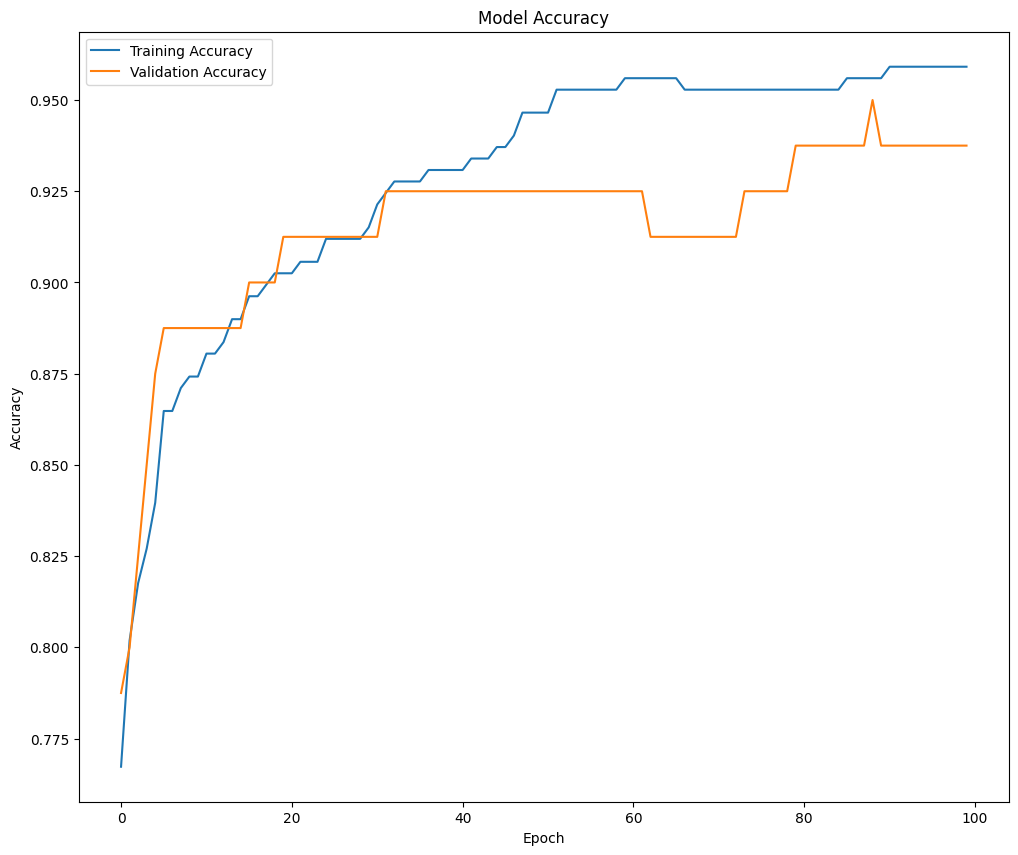

In [ ]:
# Plot the training history
plt.figure(figsize=(12, 10))

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

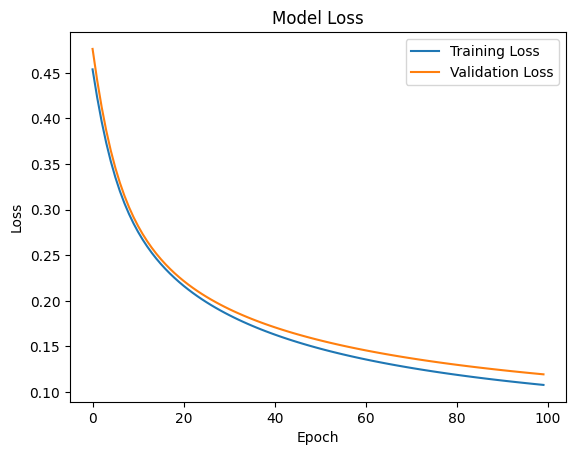

In [ ]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Text(50.722222222222214, 0.5, 'Actual')

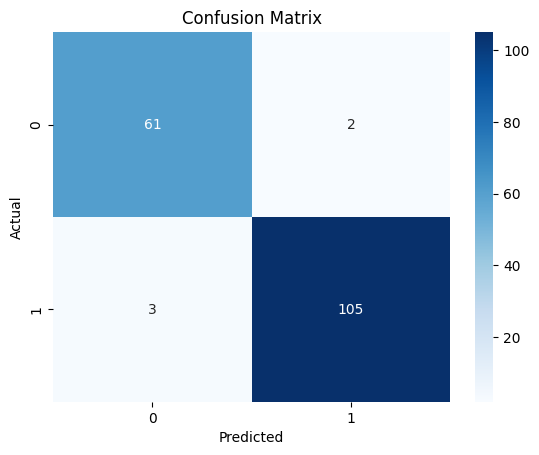

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

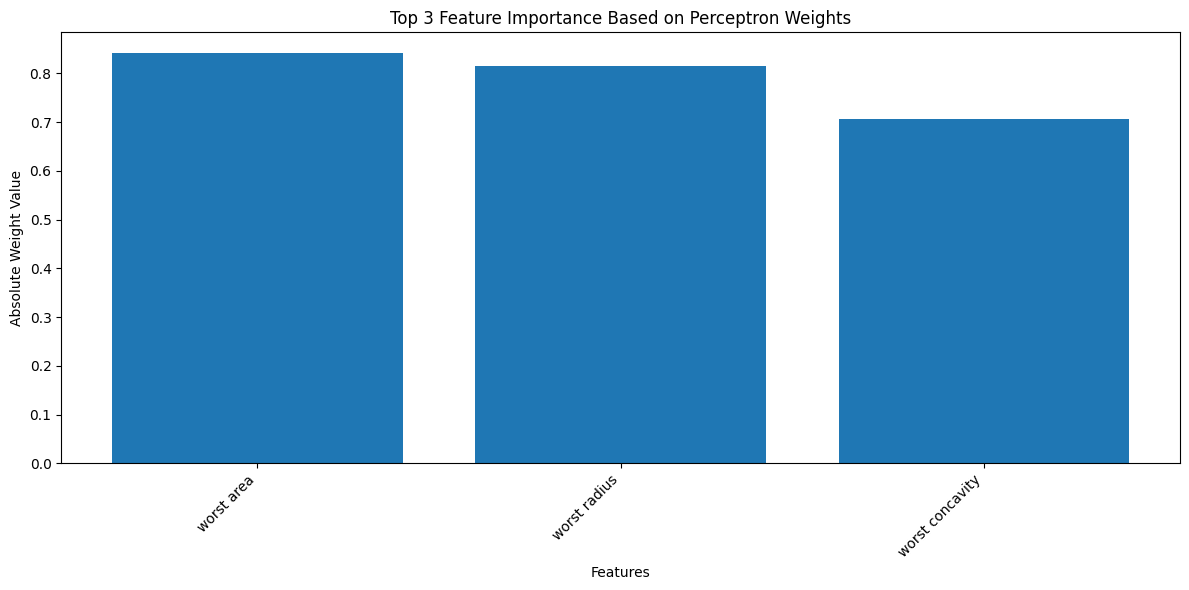

In [ ]:
# Extract and visualize feature importance
weights = model.get_weights()[0]
bias = model.get_weights()[1][0]

# Get absolute weights for feature importance
feature_importance = np.abs(weights.flatten())
feature_names = cancer.feature_names

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_idx]
sorted_names = [feature_names[i] for i in sorted_idx]

# Plot top 3 most important features
plt.figure(figsize=(12, 6))
plt.bar(range(3), sorted_importance[:3])
plt.xticks(range(3), sorted_names[:3], rotation=45, ha='right')
plt.title('Top 3 Feature Importance Based on Perceptron Weights')
plt.xlabel('Features')
plt.ylabel('Absolute Weight Value')
plt.tight_layout()
plt.show()

In [ ]:
# Print the weights and bias
print("\nModel Weights (Top 3 by magnitude):")
for i in range(3):
    idx = sorted_idx[i]
    print(f"{feature_names[idx]}: {weights[idx][0]:.4f}")
print(f"Bias: {bias:.4f}")


Model Weights (Top 3 by magnitude):
worst area: -0.8422
worst radius: -0.8150
worst concavity: -0.7068
Bias: 0.3959


In [ ]:
# Demonstrate decision making by examining a few samples
print("\nExamining decision making for a few samples:")
for i in range(2):
    sample = X_test_scaled[i]
    true_label = y_test[i]

    # Manual prediction calculation
    net_input = np.dot(sample, weights) + bias
    sigmoid_output = 1/(1 + np.exp(-net_input))
    manual_prediction = 1 if sigmoid_output > 0.5 else 0

    # Model prediction
    model_prediction = y_pred[i]

    print(f"\nSample {i+1}:")
    print(f"  Segmoid input: {net_input[0]:.4f}")
    print(f"  Sigmoid output: {sigmoid_output[0]:.4f}")
    print(f"  Model prediction: {model_prediction}")
    print(f"  True label: {true_label} ({'Malignant' if true_label == 1 else 'Benign'})")
    print(f"  Correct: {'Yes' if model_prediction == true_label else 'No'}")


Examining decision making for a few samples:

Sample 1:
  Segmoid input: 1.7514
  Sigmoid output: 0.8521
  Model prediction: 1
  True label: 1 (Malignant)
  Correct: Yes

Sample 2:
  Segmoid input: -7.3929
  Sigmoid output: 0.0006
  Model prediction: 0
  True label: 0 (Benign)
  Correct: Yes
